<a href="https://colab.research.google.com/github/TawanPolsan-2005/RSA/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6610402043 ตะวัน พลแสน

# Decision Tree & Random Forest for classification problem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get Data

In [ ]:
df = pd.read_csv('/content/mobile-small.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1266,0,0.5,0,0,1,5,0.1,95,6,...,1365,1698,1687,11,0,18,1,0,0,2
187,1934,1,2.6,1,0,1,46,0.1,103,1,...,619,1299,2940,13,9,2,1,1,1,3
188,1905,1,0.5,0,3,1,6,0.5,151,1,...,849,898,1545,9,5,10,1,1,0,1
189,1831,0,1.4,1,2,0,43,0.9,150,5,...,611,1381,3834,17,7,13,1,1,1,3


### Explore Data

In [ ]:
df.shape

(191, 21)

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='price_range', ylabel='count'>

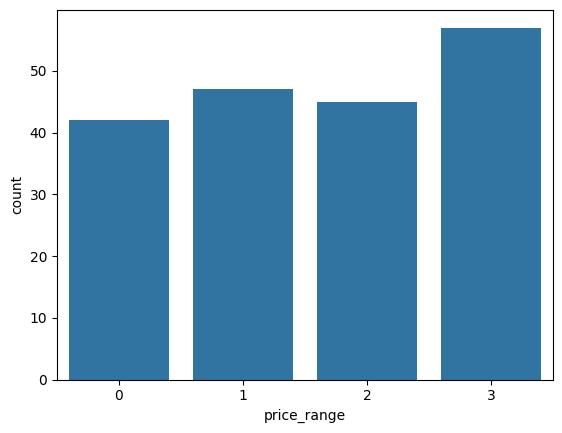

In [ ]:
sns.countplot(x='price_range', data=df)

In [ ]:
df['price_range'].value_counts()

,count
price_range,
3,57
1,47
2,45
0,42


### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1.Decision Tree Classifier (No Hyperparameter Tuning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Result

Accuracy on Training set : 1.0


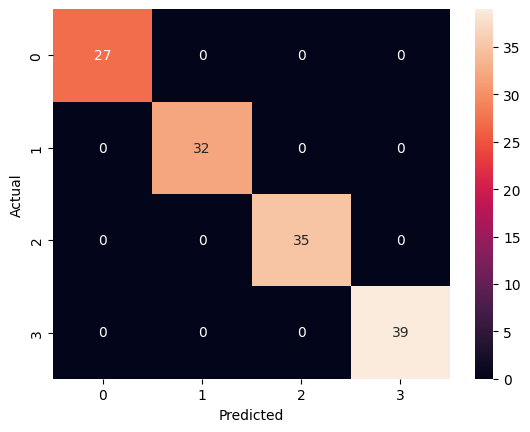

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred = DT.predict(X_train)
acc = accuracy_score(y_train, pred)
plt.cm = confusion_matrix(y_train, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Training set :', acc)

### Testing Result

Accuracy on Testing set : 0.7241379310344828


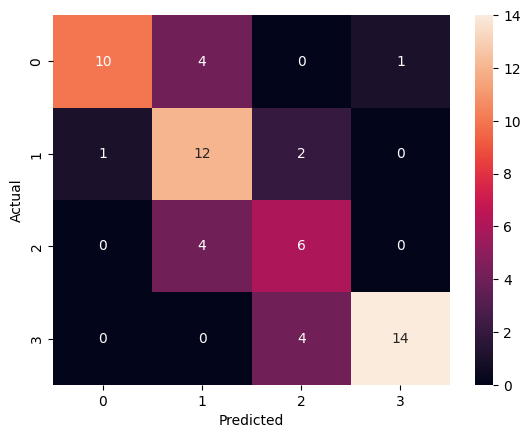

In [ ]:
pred = DT.predict(X_test)
acc = accuracy_score(y_test, pred)
plt.cm = confusion_matrix(y_test, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Testing set :', acc)

# 1.1 Decision Tree Classifier (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1, 20)
}
DT = DecisionTreeClassifier()
grid_search = GridSearchCV(DT, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': [2, 5, 10]})

In [ ]:
grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### **After finding the best parameter by using GridSearchCV**
- **criterion** : entropy
---
- **max_depth** : 15
---
- **min_samples_leaf** : 1
---
- **min_samples_split** : 5
---



In [ ]:
best_DT = grid_search.best_estimator_
best_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5)

### Training Result

Accuracy on Training set : 0.9624060150375939


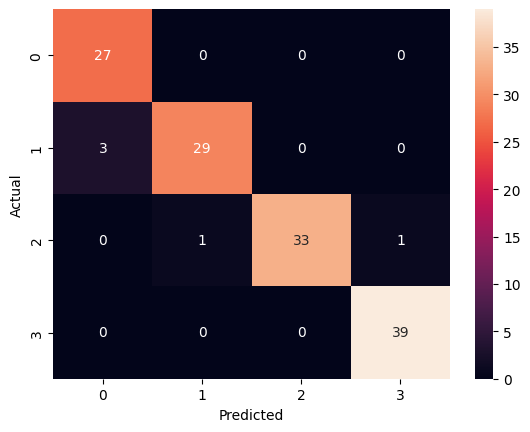

In [ ]:
pred = best_DT.predict(X_train)
acc = accuracy_score(y_train, pred)
plt.cm = confusion_matrix(y_train, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Training set :', acc)

### Testing Result

Accuracy on Testing set : 0.7586206896551724


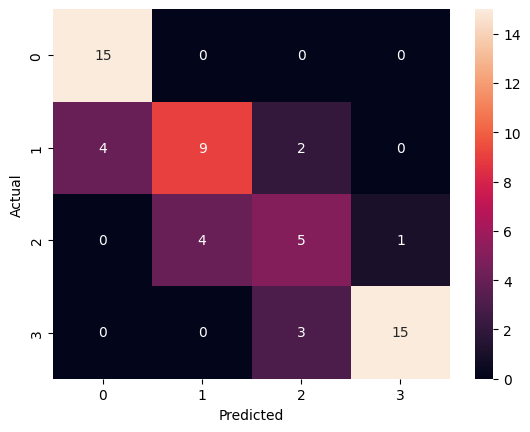

In [ ]:
pred = best_DT.predict(X_test)
acc = accuracy_score(y_test, pred)
plt.cm = confusion_matrix(y_test, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Testing set :', acc)

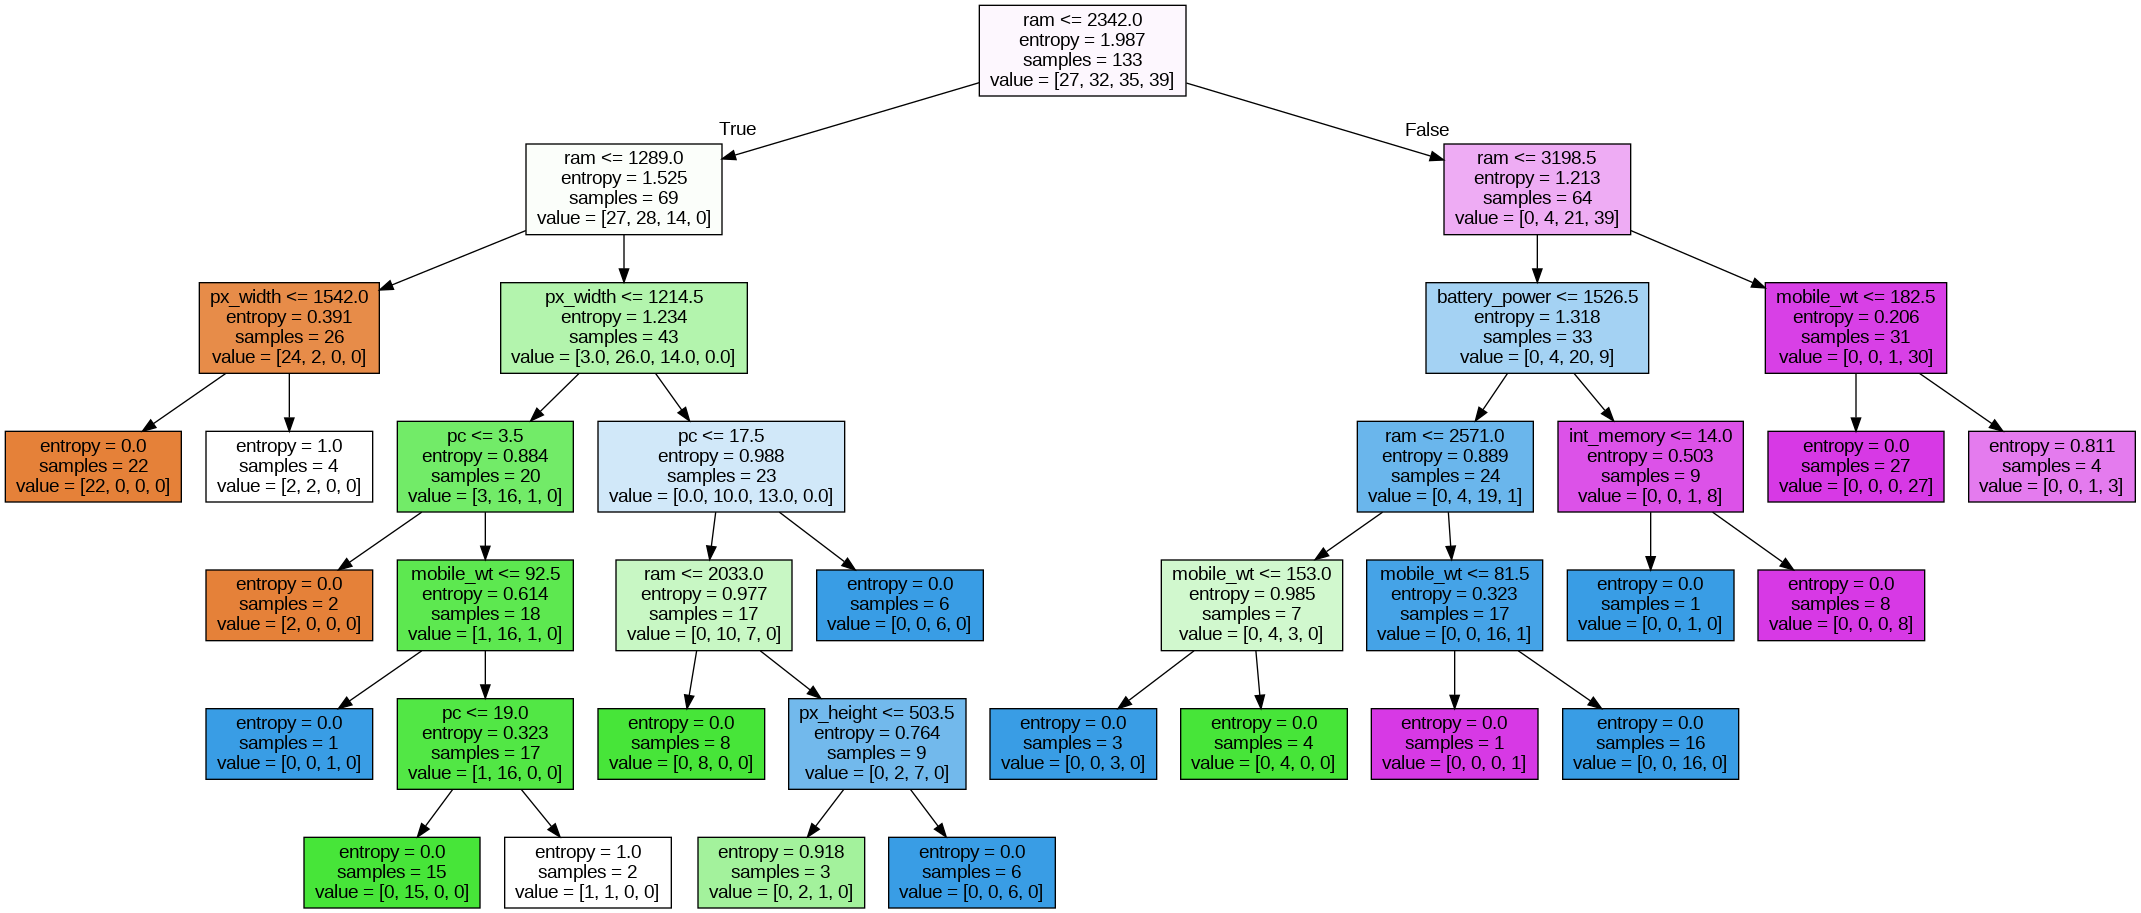

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
import pydot

features = list(X.columns)
dot_data = StringIO()
export_graphviz(best_DT, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# 2. Random Forest (No Parameter Tuning)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

### Training Result

Accuracy on Training set : 1.0


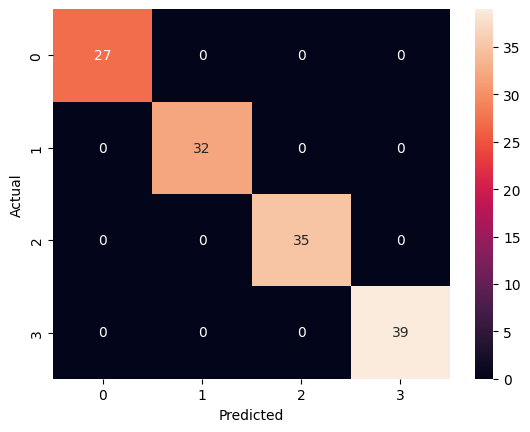

In [ ]:
pred = RF.predict(X_train)
acc = accuracy_score(y_train, pred)
plt.cm = confusion_matrix(y_train, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Training set :', acc)

### Testing Result

Accuracy on Testing set : 0.7758620689655172


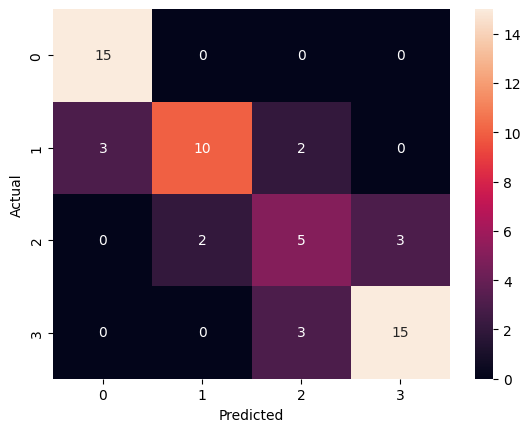

In [ ]:
pred = RF.predict(X_test)
acc = accuracy_score(y_test, pred)
plt.cm = confusion_matrix(y_test, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Testing set :', acc)

# 2.2 Random Forest (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
RF = RandomForestClassifier()
random_search = RandomizedSearchCV(RF, random_grid, cv=3, n_iter=50, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=2)

In [ ]:
random_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### **After finding the best parameter by using RandomizedSearchCV**
- **criterion** : gini
---
- **max_depth** : 50
---
- **min_samples_leaf** : 1
---
- **min_samples_split** : 2
---
- **n_estimators** : 400
---
- **bootstrap** : True
---



In [ ]:
best_RF = random_search.best_estimator_
best_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=400)

### Training Result

Accuracy on Training set : 1.0


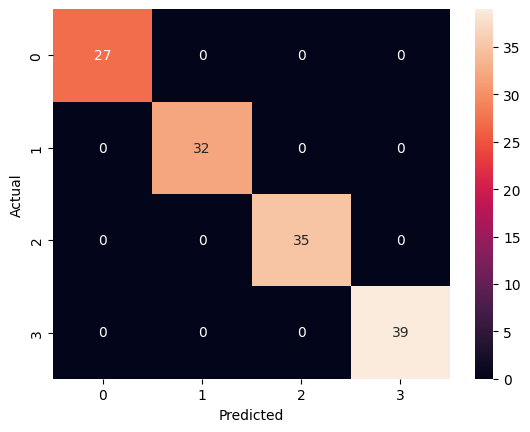

In [ ]:
pred = best_RF.predict(X_train)
acc = accuracy_score(y_train, pred)
plt.cm = confusion_matrix(y_train, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Training set :', acc)

### Testing Result

Accuracy on Testing set : 0.8103448275862069


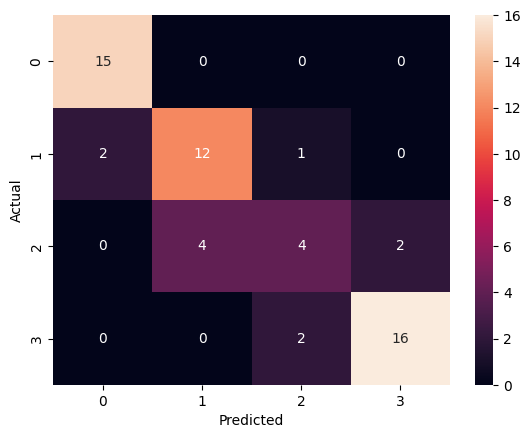

In [ ]:
pred = best_RF.predict(X_test)
acc = accuracy_score(y_test, pred)
plt.cm = confusion_matrix(y_test, pred)
sns.heatmap(plt.cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy on Testing set :', acc)

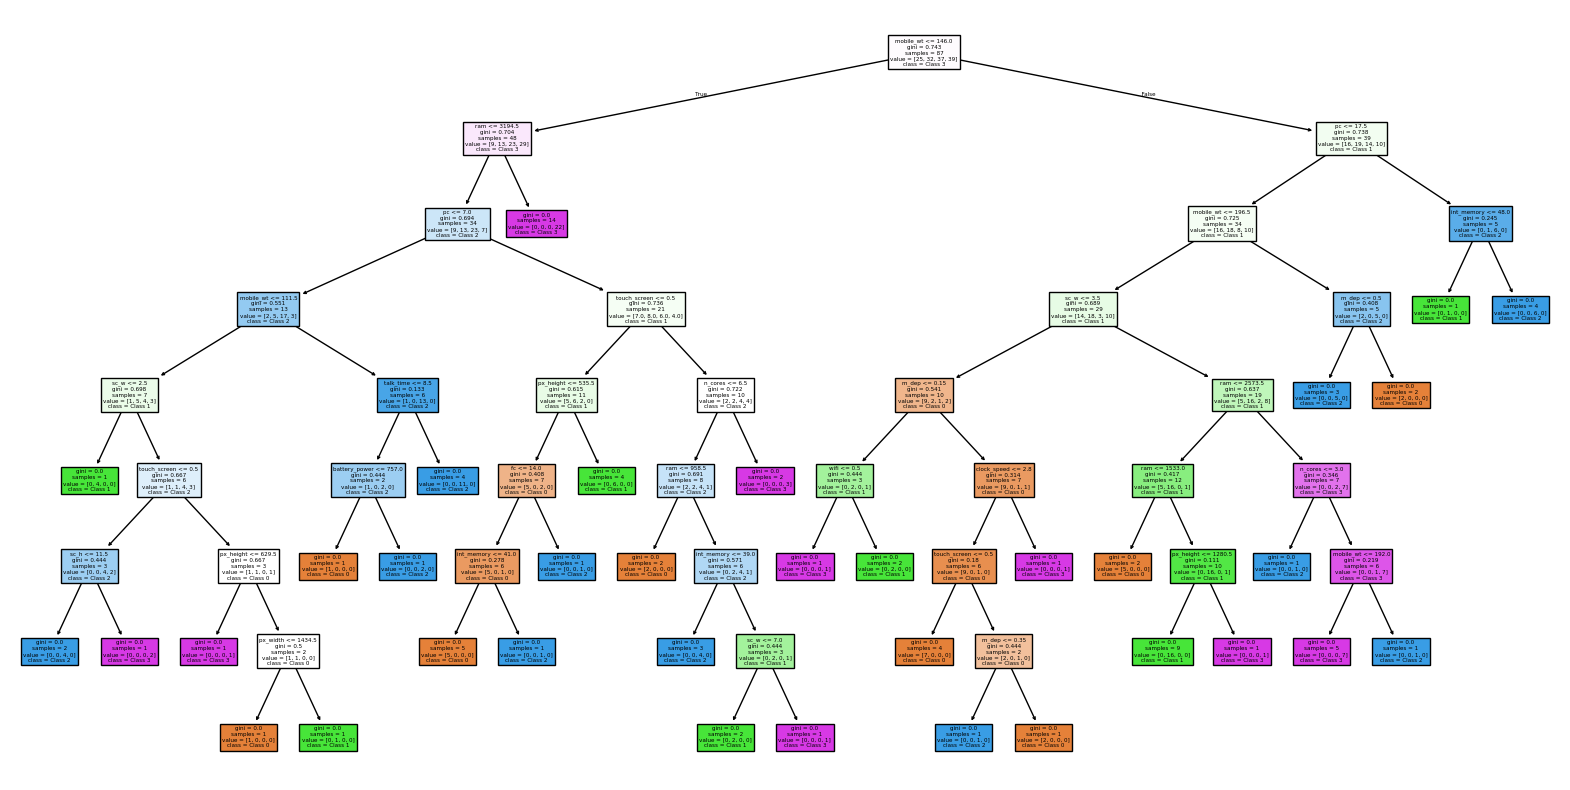

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_RF.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.show()

### Accuracy table for all models split by training set and testing set

<!DOCTYPE html>
<html lang="th">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 1500%;
            margin: 50px auto;
            border-collapse: collapse;
        }
        th, td {
            padding: 30px;
            text-align: center;
            border: 2px solid black;
        }
        th {
            background-color: #f2f2f2;
        }
        .sub-header {
            text-align: center;
            background-color: #e0e0e0;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th colspan="2" class="sub-header">DT</th>
                <th colspan="2" class="sub-header">DT (tuning)</th>
                <th colspan="2" class="sub-header">RF</th>
                <th colspan="2" class="sub-header">RF (tuning)</th>
            </tr>
            <tr>
                <th>train</th>
                <th>test</th>
                <th>train</th>
                <th>test</th>
                <th>train</th>
                <th>test</th>
                <th>train</th>
                <th>test</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>1.00</td>
                <td>0.72</td>
                <td>0.96</td>
                <td>0.75</td>
                <td>1.0</td>
                <td>0.77</td>
                <td>1.0</td>
                <td>0.81</td>
            </tr>
        </tbody>
    </table>
</body>
</html>
